In [1]:
%load_ext autoreload
%autoreload 2

import networkx as nx

from qiskit_optimization.applications.max_cut import Maxcut

from qiskit_optimization.algorithms import CplexOptimizer



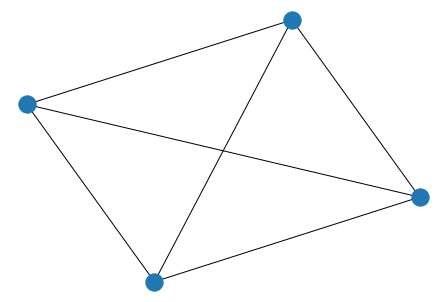

In [2]:
g= nx.gnm_random_graph(4, 6, 123)
pos = nx.spring_layout(g, seed=111)
nx.draw(g, pos=pos)

In [3]:
op = Maxcut(g).to_quadratic_program()
op

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Max-cut

Maximize
 obj: 3 x_0 + 3 x_1 + 3 x_2 + 3 x_3 + [ - 4 x_0*x_1 - 4 x_0*x_2 - 4 x_0*x_3
      - 4 x_1*x_2 - 4 x_1*x_3 - 4 x_2*x_3 ]/2
Subject To

Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= x_3 <= 1

Binaries
 x_0 x_1 x_2 x_3
End

In [4]:
# Pass networkx's graph to the constructor of `Maxcut`
maxcut = Maxcut(g)

In [5]:
# Use `maxcut.to_quadratic_problem` to create a `QuadraticProgram` 
qp=maxcut.to_quadratic_program()
qp

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Max-cut

Maximize
 obj: 3 x_0 + 3 x_1 + 3 x_2 + 3 x_3 + [ - 4 x_0*x_1 - 4 x_0*x_2 - 4 x_0*x_3
      - 4 x_1*x_2 - 4 x_1*x_3 - 4 x_2*x_3 ]/2
Subject To

Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= x_3 <= 1

Binaries
 x_0 x_1 x_2 x_3
End

Note that $ \it{max} \sum_{i, j} w_{i,j} x_i (1-x_j)$ is used for the objective function of the max cut.

In [6]:
# Solve the created problem
optimizer = CplexOptimizer()
result = optimizer.solve(qp)
result

optimal function value: 4.0
optimal value: [1. 1. 0. 0.]
status: SUCCESS

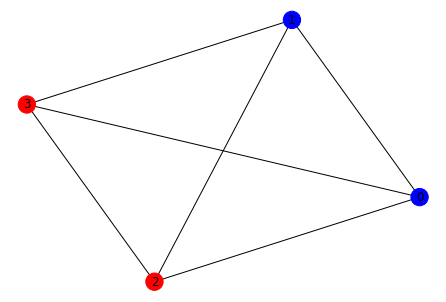

In [7]:
# Draw a graph for the maxcut with `x`. 
# "draw_graph" should be unique to each problem.
# For example, for the TSP, we should have the visiting order on each node instead of coloring in two colors.
maxcut.draw(result=result, pos=pos)

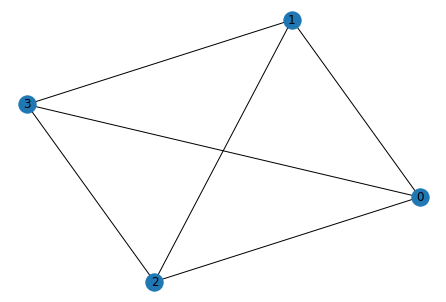

In [8]:
# If you don't pass a result, it just draw a graph with labels
# nx.draw(self._graph, pos=pos, with_labels=True) is running
maxcut.draw(pos=pos)



In [9]:
# Each problem has their own interpret function. 
# The interpret of Maxcut returns two sets of the nodes (cut)
# For TSP, it should return a list of nodes whose index corresponds to the visited order. 
cut = maxcut.interpret(result)
cut


[[2, 3], [0, 1]]

In [11]:
# maxcut.g() is used as getter
my_g = maxcut.graph

# It returns the read-only graph.
# If user tries to change it, the networkx raises the error
# * In the constructor an input graph is copyed as a read-only graph
# def __init__(self, g=None):
#     self._g = g.copy(as_view=True)


In [12]:
maxcut._graph.add_node(100)

NetworkXError: Frozen graph can't be modified

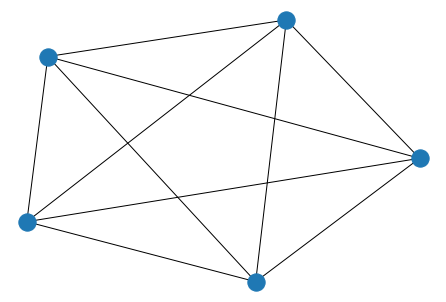

In [27]:
# A user can create a random graph with a `GraphProblem.random_graph()` method (it's a staticmethod).
nx.draw(Maxcut.random_graph(5,10))